# Telco Customer Churn Analysis

### <a href="telco_churn.ipynb" target="_self">Introduction</a>&nbsp; &nbsp; &nbsp;<a href="telco_churn_analysis.ipynb" target="_self">Further Analysis</a>&nbsp; &nbsp; &nbsp;<a href="telco_churn_insights.ipynb" target="_self">Final Insights</a>

### Analysis Objective:
   - Identify and understand patterns related to customer churn at the Telco telecommunications company.
   - Recommend potential strategies to reduce churn and improve customer retention.

This analysis of churn behavior revealed that customers on month-to-month contracts are significantly more likely to leave the service. In contrast, those on longer-term contracts, despite paying higher monthly fees, tend to stay longer. This may be attributed to value-adding features such as higher data limits, faster download speeds, and more consistent technical support. It should be noted, access to tech support emerged as a strong predictor of churn, particularly among customers who cited poor customer service as a primary reason for leaving.

This analysis used the [Telco Customer Churn](https://www.kaggle.com/datasets/abdallahwagih/telco-customer-churn) dataset from Kaggle.


In [366]:
#Installing Libraries
install.packages("readxl")
library(readxl)
install.packages("ggplot2")
install.packages("forcats")
install.packages("dplyr")
install.packages("maps")
install.packages("patchwork")
install.packages("viridis")
library(dplyr)
library(forcats)
library(maps)
library(patchwork)
library(viridis)
library(ggplot2)
suppressPackageStartupMessages(library(dplyr))
suppressMessages(suppressWarnings(library(ggplot2)))


#Import Dataset
data <- read_excel('Telco_customer_churn.xlsx')

#Rename Columns For Easier Access
colnames(data) <- c('CustomerID','Count','Country','State','City','Zip_Code','Lat_Long','Latitude','Longitude','Gender','Senior_Citizen','Partner','Dependents','Tenure_Months','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method','Monthly_Charges','Total_Charges','Churn_Label','Churn_Value','Churn_Score','CLTV','Churn_Reason')


## Getting to know Telco's Churned Customers

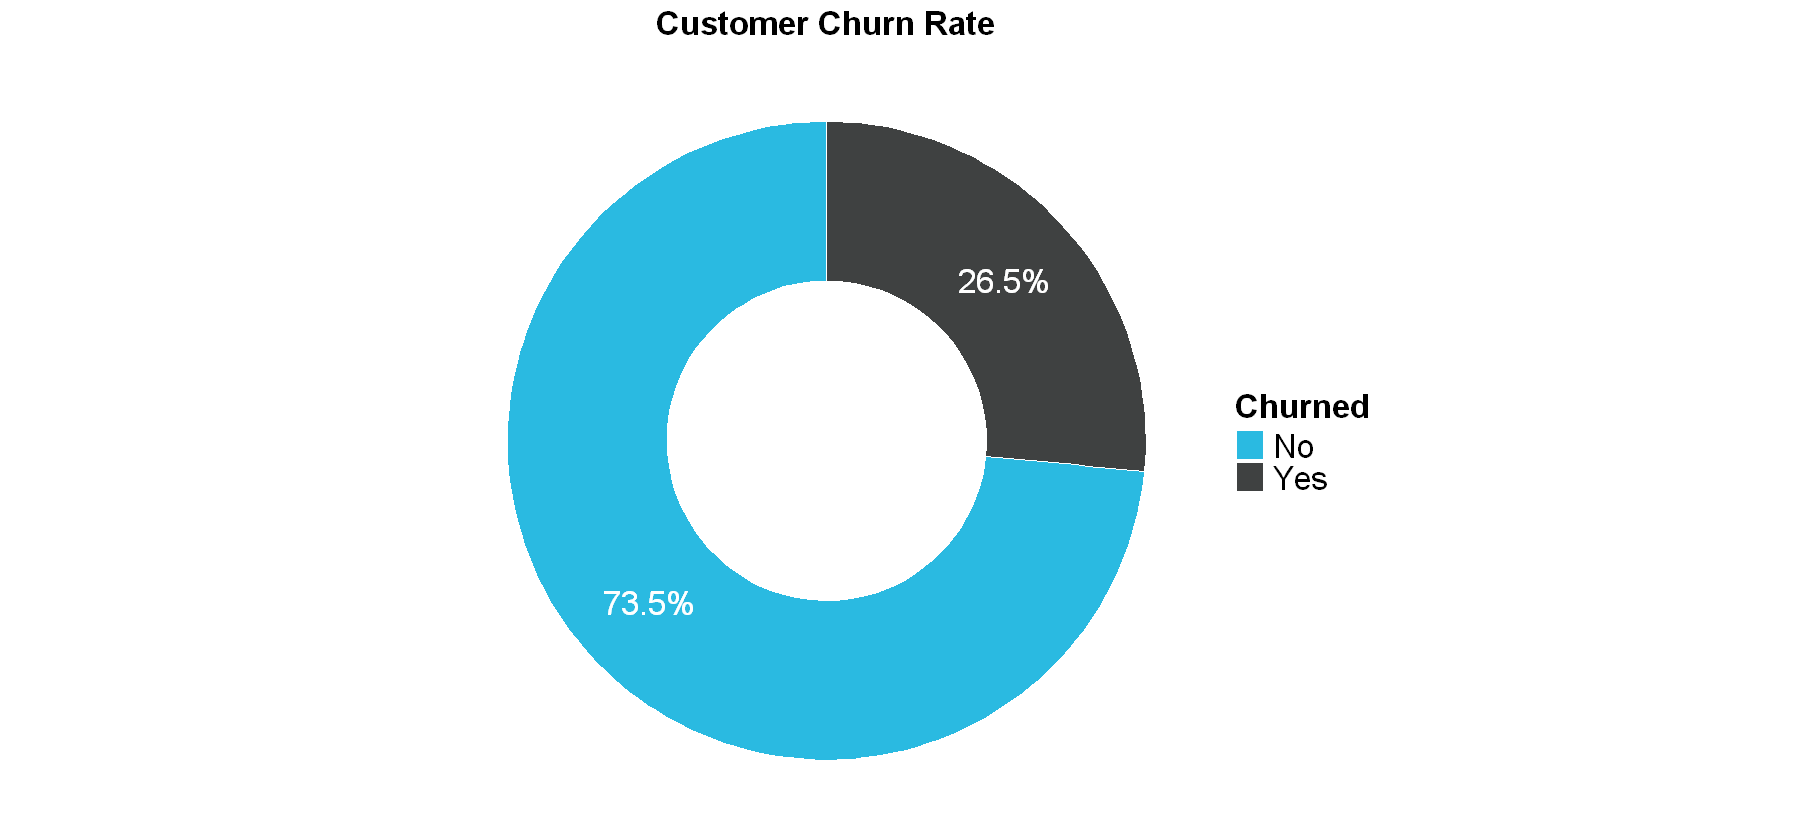

In [317]:
churn_counts <- table(data$Churn_Label)
churn_df <- as.data.frame(churn_counts)
colnames(churn_df) <- c("Churned", "Count")

churn_df$Percentage <- round(100 * churn_df$Count / sum(churn_df$Count), 1)

ggplot(churn_df, aes(x = 2, y = Count, fill = Churned)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y") +
  theme_void() +
  scale_fill_manual(values = c(
    "Yes" = "#3f4141",
    "No" = "#2abae1"  
  )) +
  ggtitle("Customer Churn Rate") +
  xlim(0.5, 2.5) +
  geom_text(
    aes(label = paste0(Percentage, "%")),
    position = position_stack(vjust = 0.5),
    color = "white",
    size = 7
  ) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 20)
  )


Using the Churn Label column from the dataset, we can determine that Telco has a churn rate of 26.5%, meaning over a quarter of it's total customers have left the service provider over time.

### Who is Churning?

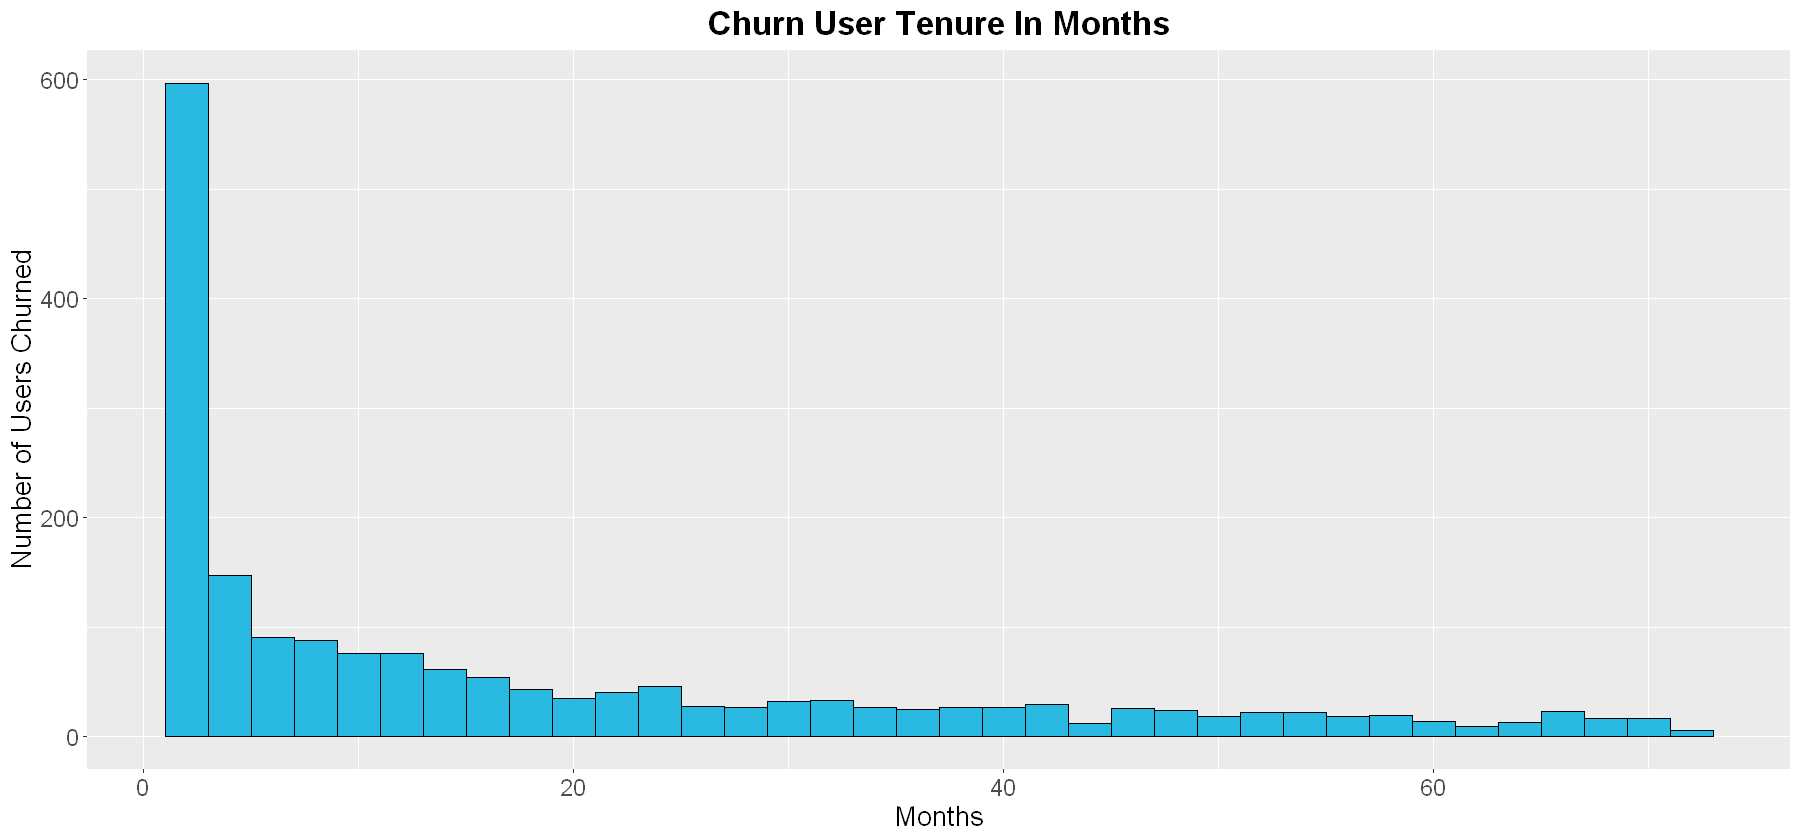

In [351]:
options(repr.plot.width = 15, repr.plot.height = 7)

data$Churn_Label <- trimws(data$Churn_Label)
churned <- data[data$Churn_Label == "Yes", ]

ggplot(churned, aes(x = Tenure_Months, fill = Churn_Label)) +
  geom_histogram(binwidth = 2, color = "black", fill="#2abae1") +
  labs(title = "Churn User Tenure In Months", x = "Values", y = "Frequency") +
  labs(fill = "Customer Churned",
      x = "Months",
      y = "Number of Users Churned" 
      ) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )

By examining the Tenure in Months of churned customers, we see that most are leaving within approximately the first year of service. This trend strongly suggests that the majority of churned customers are on month-to-month contracts, which typically offer more flexibility but less long-term commitment.

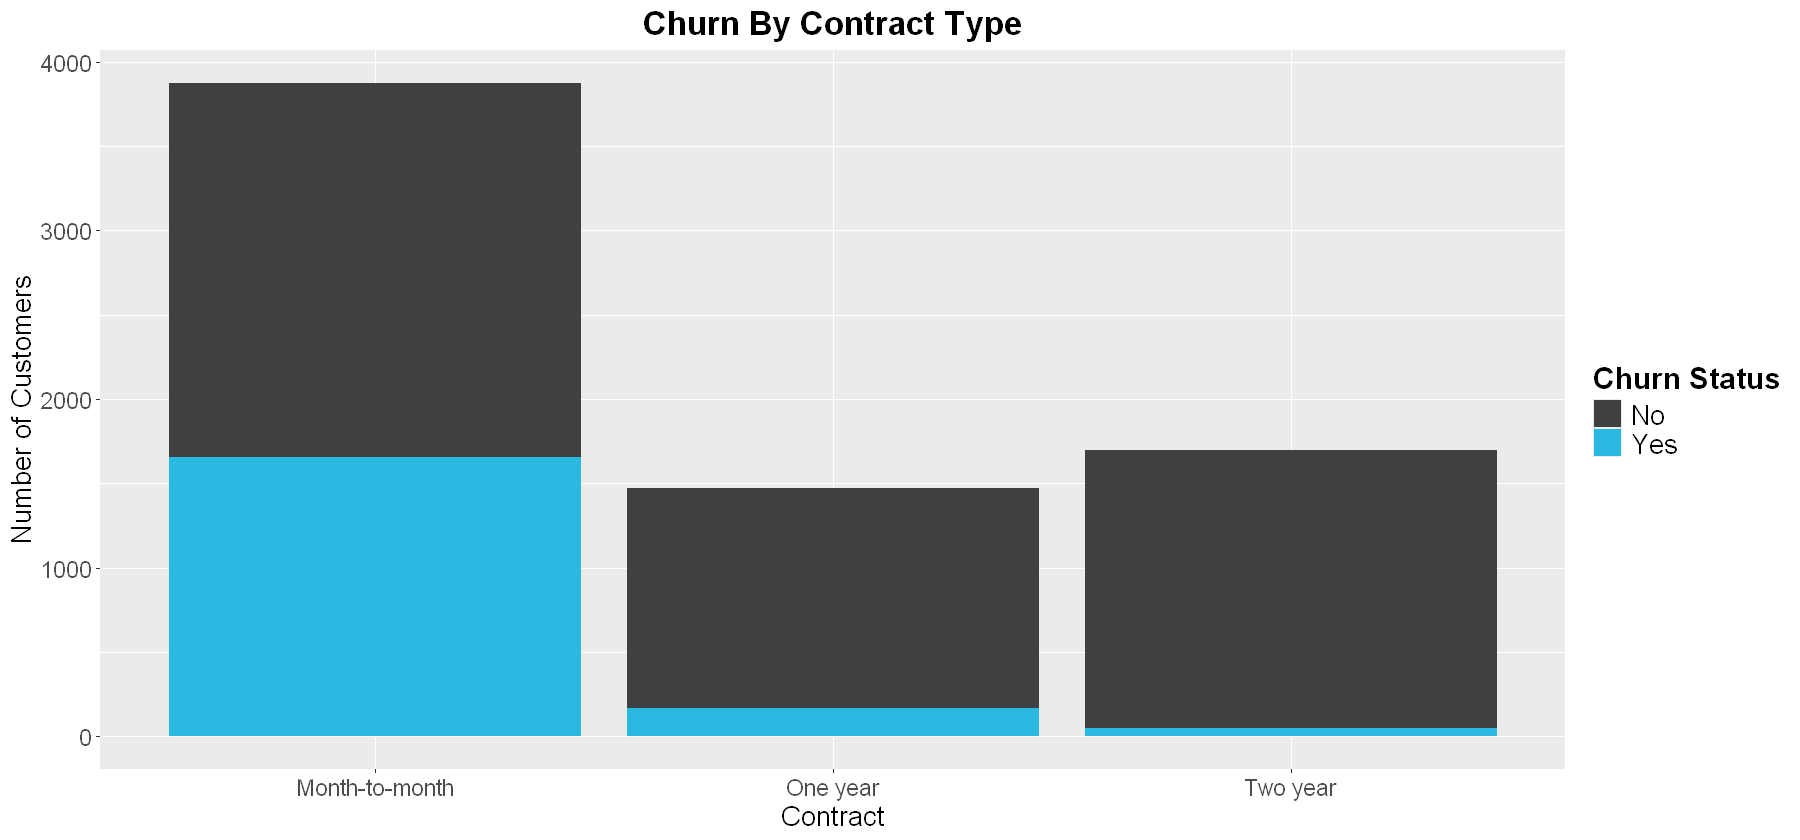

In [353]:
ggplot(data, aes(x = Contract, fill = Churn_Label)) +
    geom_bar() +
    labs(
        title = "Churn By Contract Type",
        x = "Contract",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c("Yes" = "#2abae1","No" = "#3f4141"),
        name = "Churn Status") +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 16)
  )

As expected, the data confirms that the majority of customers who have churned were on month-to-month contracts. Interestingly, we also see that a large portion of Telco's overall customer base, including those who have not churned, are on month-to-month plans. This highlights a potential vulnerability as it increases the risk of early customer departure if the customer's expectations aren’t met.

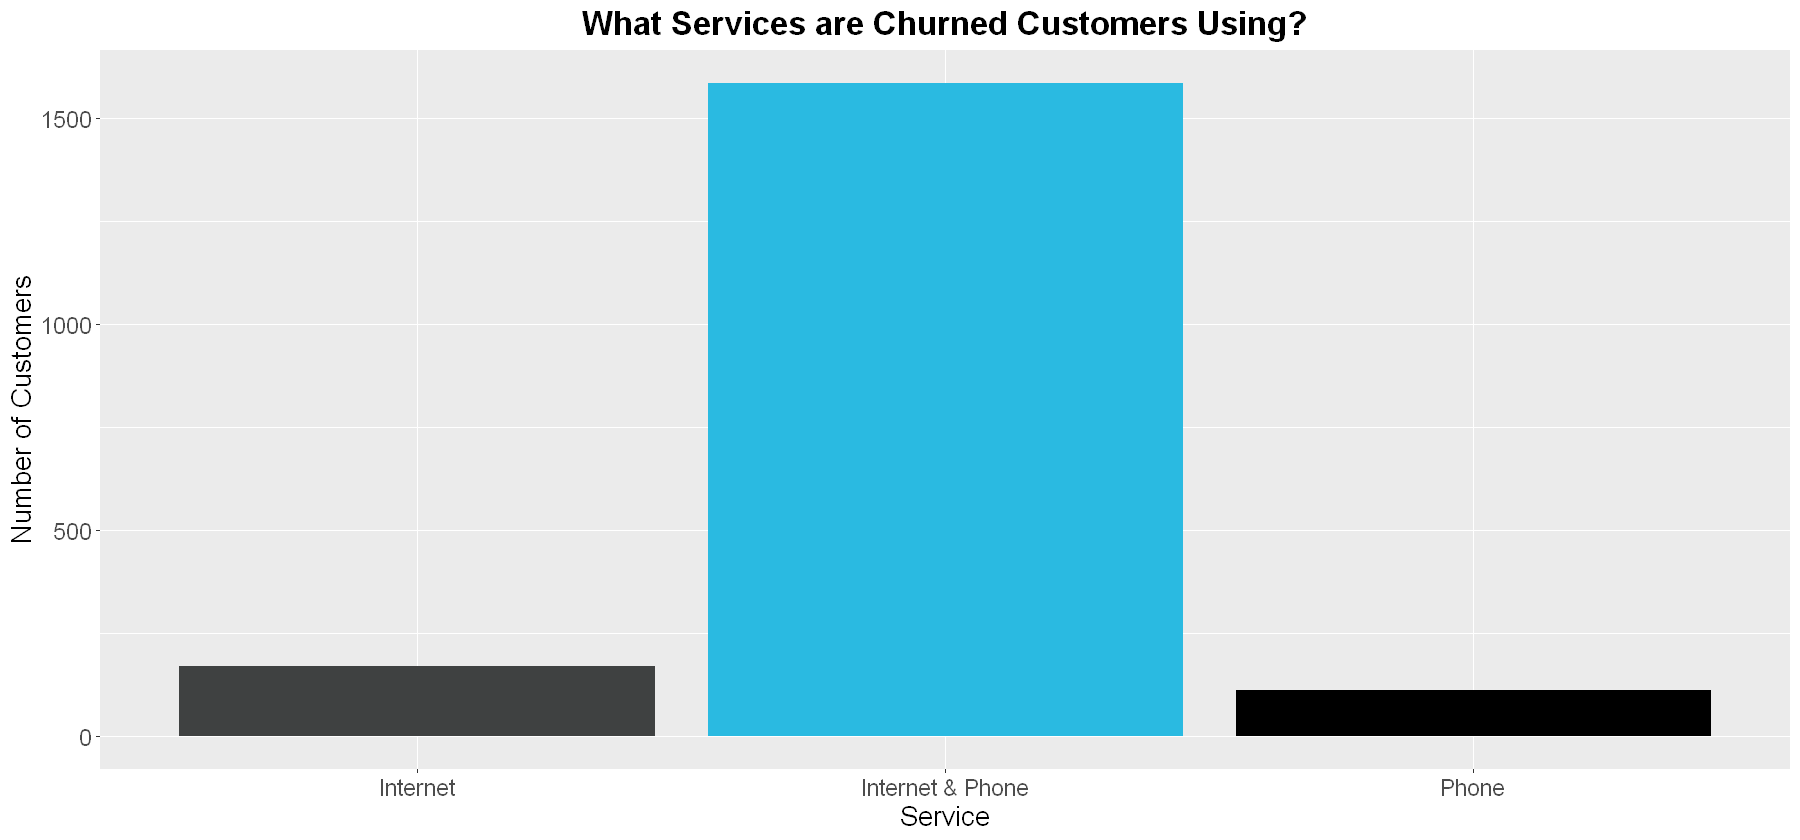

In [361]:
product_churn <- churned %>%
  mutate(
    Product_Type = case_when(
      Internet_Service == "No" & Phone_Service == "No" ~ "None",
      Internet_Service == "No" ~ "Phone",
      Phone_Service == "No" ~ "Internet",
      TRUE ~ "Internet & Phone"
    )
  )

ggplot(product_churn, aes(x = Product_Type, fill = Product_Type)) +
    geom_bar() +
    labs(
        title = "What Services are Churned Customers Using?",
        x = "Service",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c("Internet & Phone" = "#2abae1", "Internet" = "#3f4141", "Phone" = "#000000")) +
    theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )


Evaluating the Phone and Internet Services data reveals that most churned customers were using both internet and phone services from Telco.

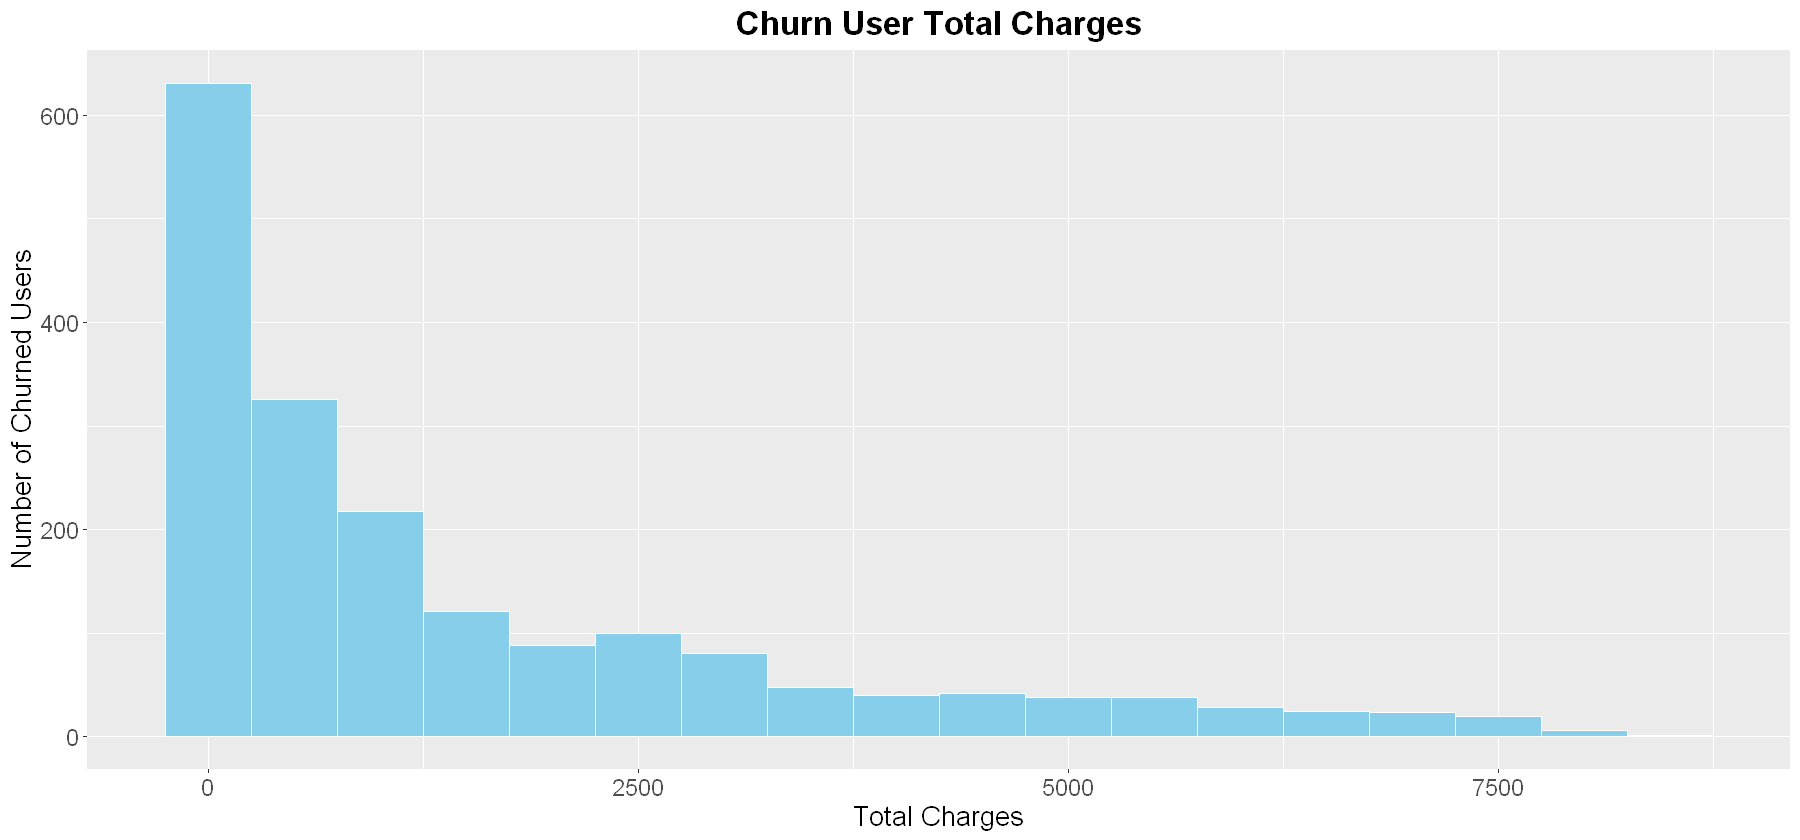

In [359]:
ggplot(churned, aes(x = Total_Charges, fill = Churn_Label)) +
  geom_histogram(binwidth = 500, color = "white", fill = "skyblue") +
  labs(title = "Churn User Total Charges", x = "Values", y = "Frequency") +
  labs(fill = "Customer Churned",
      x = "Total Charges",
      y = "Number of Churned Users" 
      ) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )

On average, churned customers spent less than $1,500 with Telco before leaving, which aligns with the observation that most churn occurs within the first year of service.

### Why Are Customers Churning?

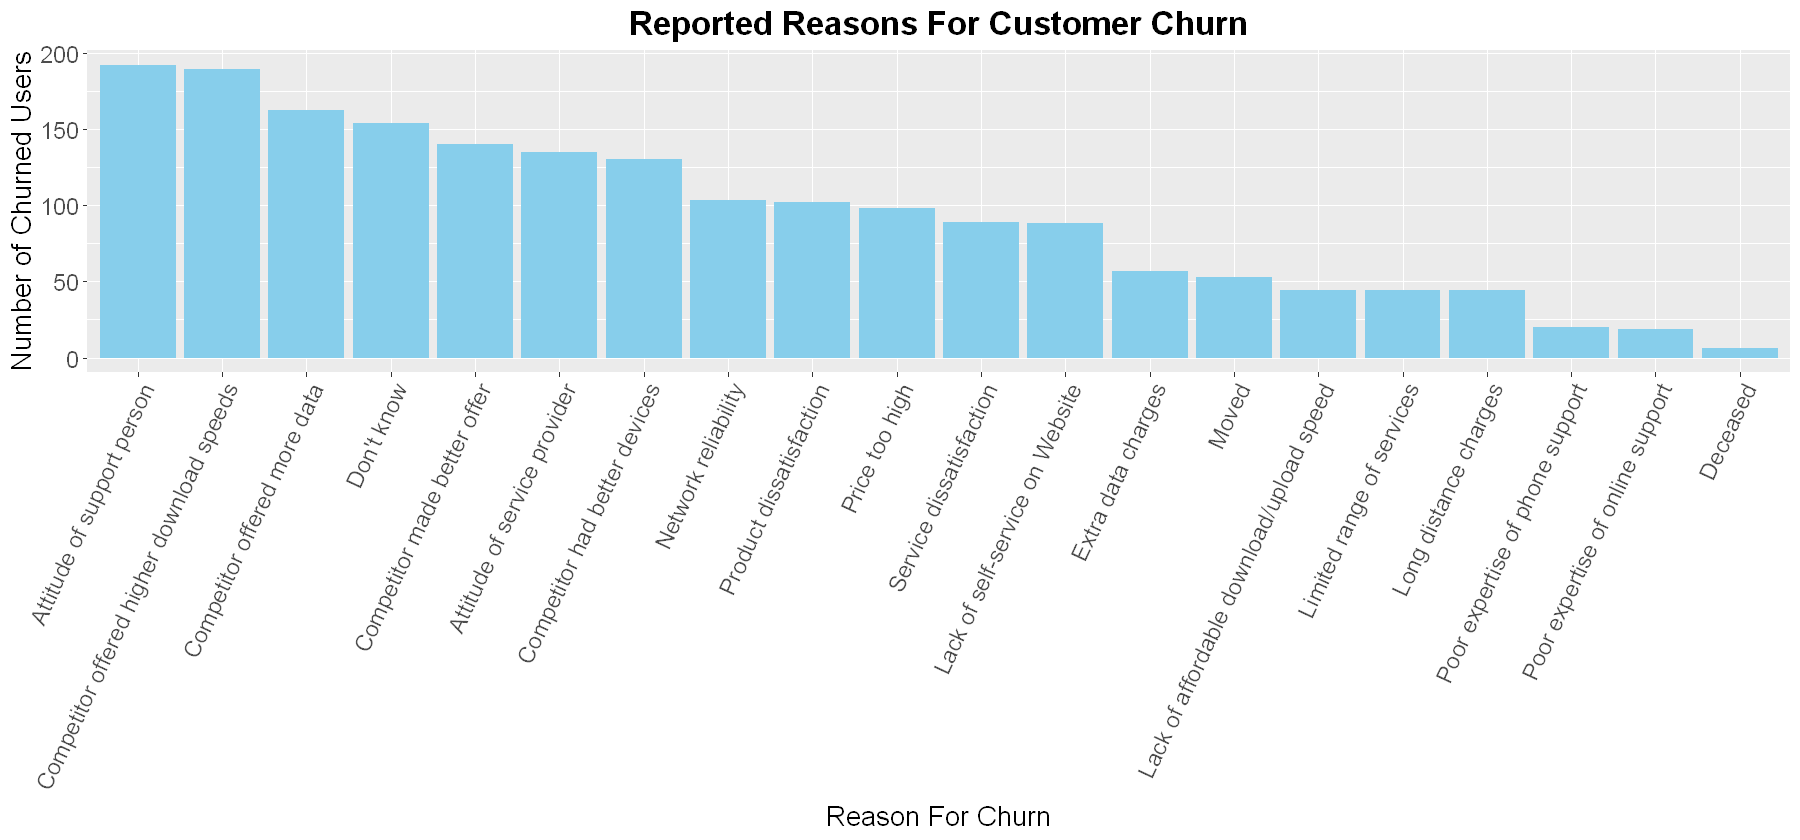

In [352]:
ggplot(churned, aes(x = fct_infreq(Churn_Reason))) +
  geom_bar(fill = "skyblue") +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(angle = 65, hjust = 1, size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)) +
  labs(title = "Reported Reasons For Customer Churn", x = "Reason For Churn", y = "Number of Churned Users")

Upon evaluation of the Churn Reasons provided by customers, we can see that customers leave for many reasons. These reasons can be organized into the following categories:

- **Customer Support**
   - Attitude of Support Person
   - Attitude of Service Provider
   - Poor Expertise of Phone Support
   - Poor Expertise of Online Support
   - Lack of Self-Service on Website
- **Competition**
   - Competitor Offered Higher Download Speeds
   - Competitor Offered More Data
   - Competitor Made Better Offer
   - Competitor Had Better Devices
- **Overall Cost**
   - Price Too High
   - Extra Data Charges
   - Long Distance Charges
   - Lack of Affordable Download/Upload Speed
- **Product/ Service**
   - Network Reliability
   - Product Dissatisfaction
   - Service Dissatisfaction
   - Limited Range of Services
- **Personnal/ Other**
   - Moved
   - Deceased
   - Don't Know

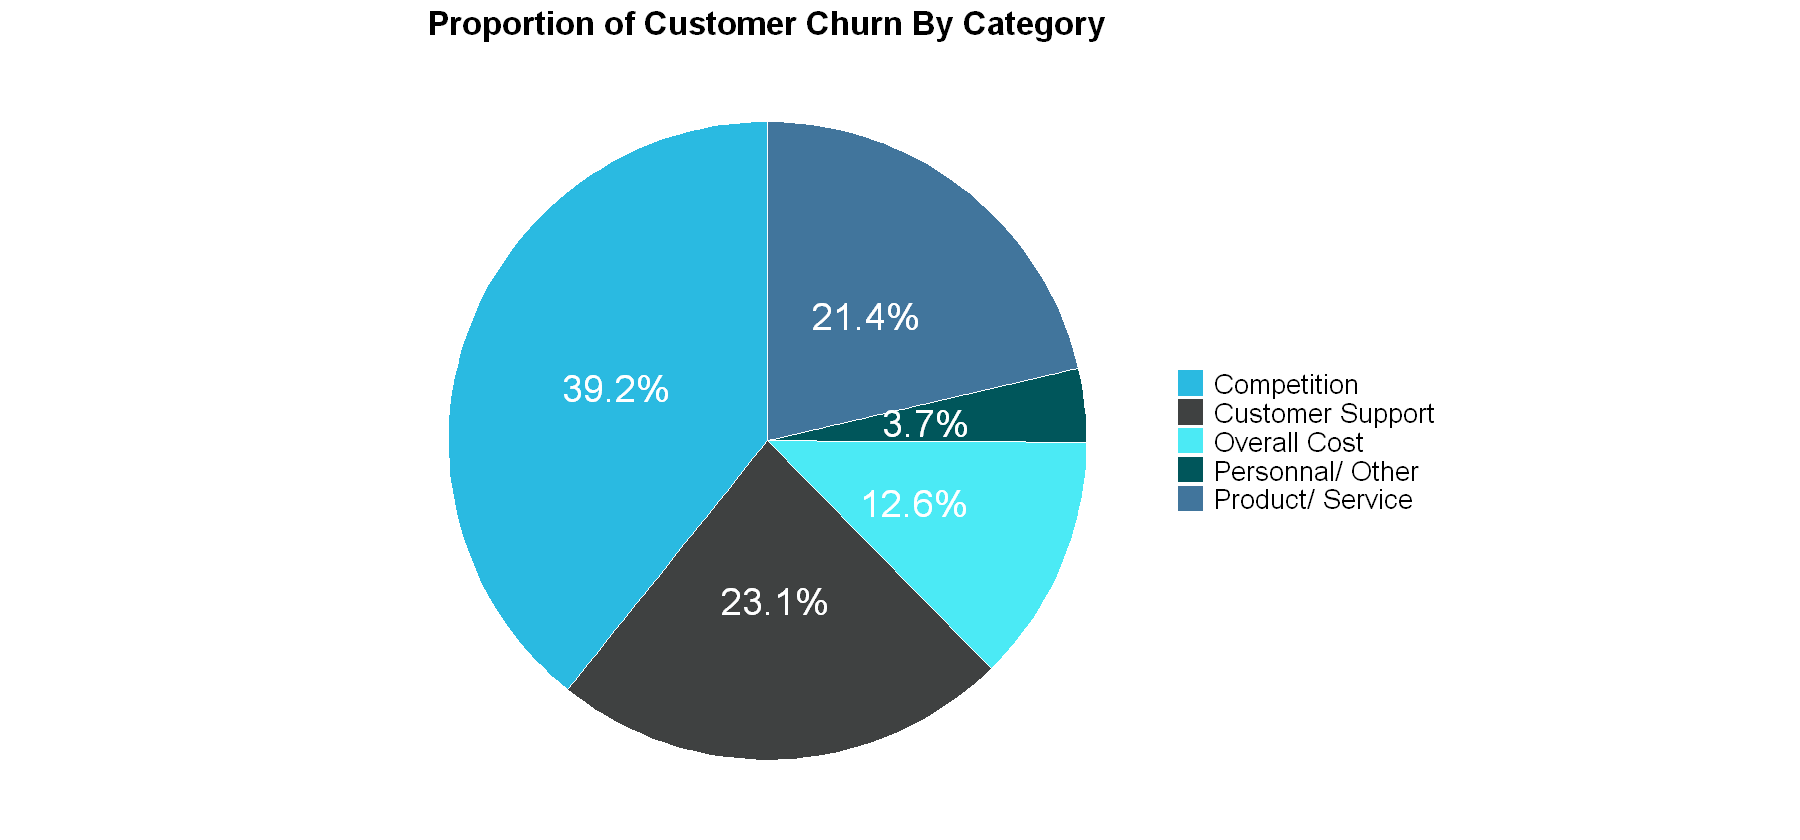

In [350]:
support_churn <- data[data$Churn_Reason %in% c(
  "Attitude of support person",
  "Attitude of service provider",
  "Poor expertise of phone support",
  "Poor expertise of online support",
  "Lack of self-service on website"
), ]

competition_churn <- data[data$Churn_Reason %in% c(
  "Competitor made better offer",
  "Competitor had better devices",
  "Competitor offered higher download speeds",
  "Competitor offered more data"
), ]

cost_churn <- data[data$Churn_Reason %in% c(
  "Price too high",
  "Extra data charges",
  "Long distance Charges",
  "Lack of affordable download/upload speed"
), ]

product_service_churn <- data[data$Churn_Reason %in% c(
  "Network reliability",
  "Product dissatisfaction",
  "Service dissatisfaction",
  "Limited range of services"
), ]

other_churn <- data[data$Churn_Reason %in% c(
  "Moved",
  "Deceased",
  "Dont't Know"
), ]

total_support_churn <- nrow(support_churn)
total_competition_churn <- nrow(competition_churn)
total_cost_churn <- nrow(cost_churn)
total_product_service_churn <- nrow(product_service_churn)
total_other_churn <- nrow(other_churn)

pie_data <- data.frame(
  Category = c("Customer Support", "Competition", "Overall Cost", "Product/ Service", "Personnal/ Other"),
  Count = c(total_support_churn, total_competition_churn, total_cost_churn, total_product_service_churn, total_other_churn)
)

ggplot(pie_data, aes(x = "", y = Count, fill = Category)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = paste0(round(Count / sum(Count) * 100, 1), "%")),
            position = position_stack(vjust = 0.5), size = 8,  color = "white") +
  labs(title = "Proportion of Customer Churn By Category") +
  scale_fill_manual(values = c("Competition" = "#2abae1", "Customer Support" = "#3f4141", "Overall Cost"= "#4beaf5", "Product/ Service" = "#41759c", "Personnal/ Other" = "#00565b")) +
  theme_void() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_blank(),
    legend.text = element_text(size = 16)
  )

Once the churn reasons are grouped into broader categories, we can see that the majority of customer churn is driven by Competition (39.2%), followed by Poor Customer Support (23.1%) and Product/Service Dissatisfaction (21.4%). These three categories alone account for the majority of churn and highlight critical areas where Telco is losing customers.